In [1]:
from Precode2 import *
import numpy
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S2('8929') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[5.74511019 5.32034026]
6
[6.8113456  0.99804859]


In [4]:
def show_results(points, centroids, kmeans_losses, data):
    """
    show experiment results
    
    args:
        input:
            points : the class number assigned
            centroids : the coordinate of the centroids
            kmeans_losses : the list of the loss of each iteration's kmeans loss
        output:
            graphs
    """
    import pandas as pd
    
    print(centroids)
    print(kmeans_losses[-1])
    
    df = pd.DataFrame(data)
    df["class"] = points
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    ax[0].plot(kmeans_losses)
    ax[0].set_title("losses")
    
    colors = ["red", "green", "blue", "yellow", "gray", "magenta"]
    
    for i in range(len(centroids)):
        ax[1].scatter(df[df["class"]==i][0], df[df["class"]==i][1], color=colors[i], label=str(i))

In [20]:
def kmeans_project2(x, k, num_of_iterations, i_points):
    # centroid's coordinate
    centroids = np.array([i_points.tolist()])
    
    # k-means objective function loss
    kmeans_losses = []
    
    # Repeating the above steps for a defined number of iterations
    for ni in range(num_of_iterations):
        
        # when ni == 0, we need to collect other clustering coordinates
        # from the given sample using k-means++
        if ni == 0:
            for c_id in range(k-1):
                distances = cdist(x, centroids, "euclidean")
            
                candidates = np.array([np.mean(dist) for dist in distances])
                 
                next_cent = x[np.argmax(candidates), :]
                
                while True:
                    if next_cent in centroids:
                        tmp = np.argmax(candidates)
                        candidates[tmp] = 0.0
                        next_cent = x[np.argmax(candidates), :]
                    else:
                        break
                
                centroids = np.vstack((centroids, next_cent))
            print(centroids)
        else:
            centroids = []
            
            for idx in range(k):
                # update centroids by current cluster's mean
                tmp_centroid = x[points==idx].mean(axis=0)
                centroids.append(tmp_centroid)
            
            # update centroid
            centroids = np.array(centroids)
        
        distances = cdist(x, centroids, "euclidean")
        points = np.array([np.argmin(dist) for dist in distances])
        
        # calculate loss function
        tmp_sum = 0
        for i in range(k):
            tmp_data = np.sum((x[points==i]-centroids[i])**2)
            tmp_sum += tmp_data
        kmeans_losses.append(tmp_sum)
        
    return points, centroids, kmeans_losses 

[[ 5.74511019  5.32034026]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]]
[[7.25262683 2.40015826]
 [3.22853009 2.52404863]
 [6.62592538 7.57614917]
 [2.90547741 6.90512276]]
789.237972217795


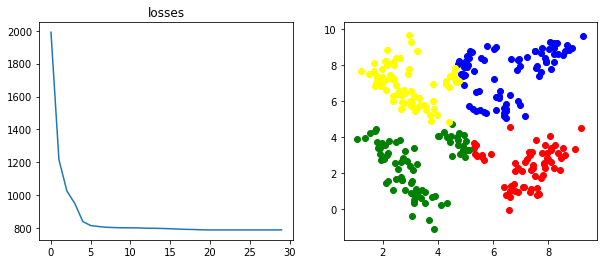

In [22]:
points, centroids, kmeans_losses = kmeans_project2(data, k1, 30, i_point1)
show_results(points, centroids, kmeans_losses, data)

[[ 6.8113456   0.99804859]
 [ 2.95297924  9.65073899]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]]
[[7.41419243 2.32169114]
 [5.46427736 6.83771354]
 [7.75648325 8.55668928]
 [3.14506148 0.90770655]
 [2.56333815 6.9782248 ]
 [3.49556658 3.56611232]]
476.118751676353


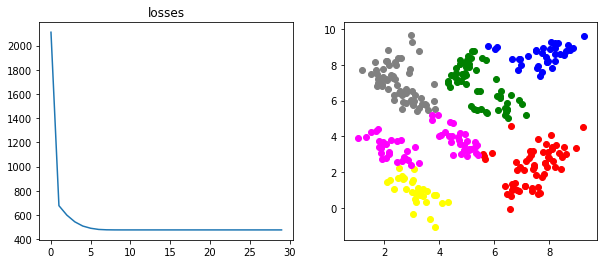

In [21]:
points, centroids, kmeans_losses = kmeans_project2(data, k2, 30, i_point2)
show_results(points, centroids, kmeans_losses, data)